In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from TP06_K_means.src.utils import *

# Travaux pratiques
##  Méthode des centres mobiles (K-means)
###  Étude des K-means sur Iris

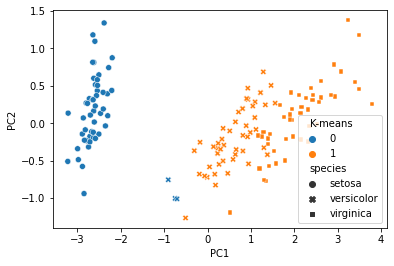

In [2]:
# Q1
iris = sns.load_dataset("iris")
from sklearn.cluster import KMeans
iris0 = iris.drop(columns=["species"])

# 2 groupements
cls = KMeans(n_clusters=2, init="random")
cls.fit(iris0)
labels = pd.Series(cls.labels_, name="K-means")
scatterplot_pca(data=iris0, hue=labels, style=iris.species)
plt.show()

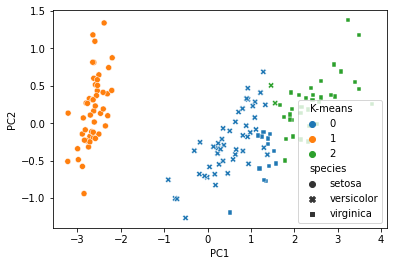

In [3]:
# 3 groupements
cls = KMeans(n_clusters=3, init="random")
cls.fit(iris0)
labels = pd.Series(cls.labels_, name="K-means")
scatterplot_pca(data=iris0, hue=labels, style=iris.species)
plt.show()


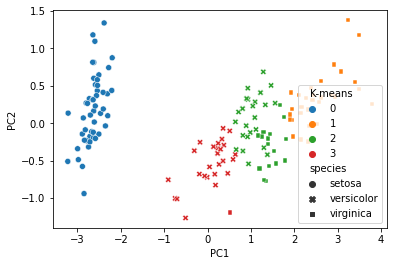

In [4]:
# 4 groupements
cls = KMeans(n_clusters=4, init="random")
cls.fit(iris0)
labels = pd.Series(cls.labels_, name="K-means")
scatterplot_pca(data=iris0, hue=labels, style=iris.species)
plt.show()

In [6]:
# Q2
def kmeans_dataset(dataset, n_clusters_list, strategies, tries):
    for n_clusters in n_clusters_list:
        for strategy in strategies:
            for rs in range(tries): # On utilisera `rs` pour fixer le `random_state`
                inertia = KMeans(n_clusters=n_clusters, n_init=1, random_state=rs, init=strategy,).fit(dataset).inertia_

                yield rs, strategy, n_clusters, inertia

gen = kmeans_dataset(iris0, [3, 5, 10], ["random", "k-means++"], 100)

df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters", "inertia"])
df = df.astype({"seed": "int32", "n_clusters": "int32"})

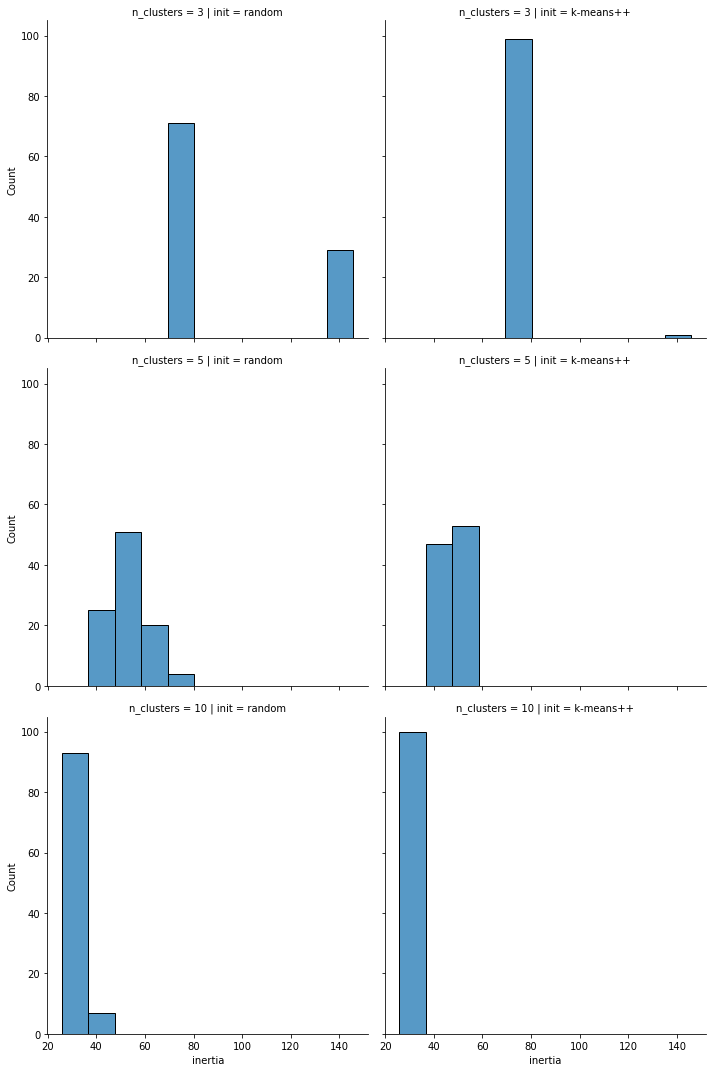

In [7]:
# Q3
sns.displot(df, x="inertia", row="n_clusters", col="init")
plt.show()

Inertia= 145.76493787223754


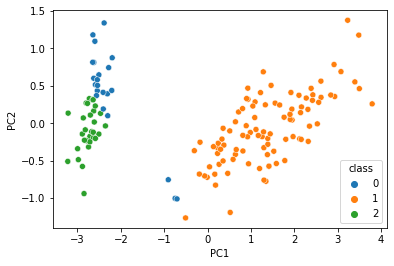

In [10]:
# Q4
df_3r = df.loc[(df.init=="random") & (df.n_clusters==3),:]
bad_seed = df_3r.inertia.idxmax()

cls = KMeans(n_clusters=3, n_init=1, random_state=bad_seed, init="random").fit(iris0)
print("Inertia=",cls.inertia_)

scatterplot_pca(data=iris0, hue=cls.labels_)
plt.show()

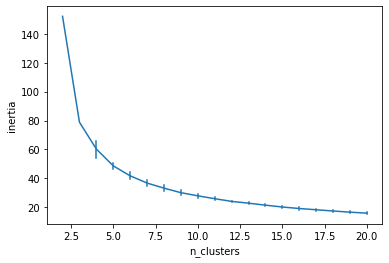

In [11]:
# Q5
gen = kmeans_dataset(iris0, range(2, 21), ["k-means++"], 20)
df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters", "inertia"])

sns.lineplot(x="n_clusters", y="inertia", data=df.loc[df.init == "k-means++"], err_style="bars", ci="sd")
plt.show()

### Données Crabs

In [ ]:
# Q6
crabs = pd.read_csv("TP06_K_means/data/crabs.csv", sep="\s+")
crabsquant = crabs.iloc[:, 3:8]

crabsquant = crabsquant.apply(lambda row: row / sum(row), axis=1)

cls = KMeans(n_clusters=2).fit(crabsquant)

scatterplot_pca(data=crabsquant, hue=cls.labels_)
plt.show()

In [ ]:
inertias = [KMeans(n_clusters=2, init="random", n_init=1, random_state=i).fit(crabsquant).inertia_ for i in range(1000)]

# Indices des classifications d'inerties différentes
inertias, idxs_uniq, idxs = np.unique(inertias, return_index=True, return_inverse=True)

# Fréquence des inerties
print(np.bincount(idxs))

print(inertias)

In [ ]:
# Q7
cls = KMeans(n_clusters=3).fit(crabsquant)
scatterplot_pca(data=crabsquant, hue=cls.labels_)
plt.show()

In [ ]:
inertias = [KMeans(n_clusters=3, init="random", n_init=1, random_state=i).fit(crabsquant).inertia_ for i in range(1000)]

# Indices des classifications d'inerties différentes
inertias, idxs_uniq, idxs = np.unique(inertias, return_index=True, return_inverse=True)

# Fréquence des inerties
print(np.bincount(idxs))

print(inertias)

In [ ]:
# Q8
from sklearn.metrics import adjusted_rand_score
cls = KMeans(n_clusters=4).fit(crabsquant)
adjusted_rand_score(crabs.sp+crabs.sex, cls.labels_)

In [ ]:
scatterplot_pca(data=crabsquant, hue=cls.labels_, style=crabs.sp+crabs.sex)
plt.show()

### De l’intérêt d’une bonne initialisation

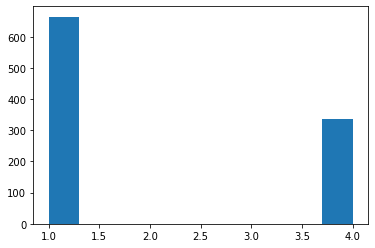

In [12]:
# Q9
a = 2
b = 1
X = np.array([[a / 2, b / 2], [a / 2, -b / 2], [-a / 2, b / 2], [-a /2, -b / 2]])

inertias = [KMeans(n_clusters=2, n_init=1, random_state=i, init="random").fit(X).inertia_ for i in range(1000)]

plt.hist(inertias)
plt.show()

In [13]:
_, counts = np.unique(inertias, return_counts=True)
print(counts)

[664 336]


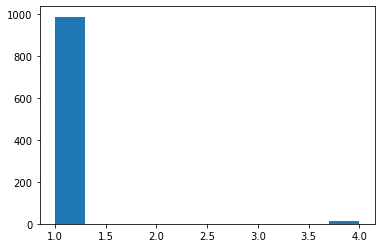

In [14]:
# Q10
inertias = [KMeans(n_clusters=2, n_init=1, random_state=i).fit(X).inertia_ for i in range(1000)]
plt.hist(inertias)
plt.show()

In [15]:
_, counts = np.unique(inertias, return_counts=True)
print(min(counts) / 1000)
print(1 / (4 * (1 + (a / b) ** 2) ** 2))

0.013
0.01


## Visualisation de classifications

In [ ]:
# Q11
inertias = [KMeans(n_clusters=3, init="random", n_init=1, random_state=i).fit(crabsquant).inertia_ for i in range(1000)]
inertias, idxs_uniq, idxs = np.unique(inertias, return_index=True, return_inverse=True)
idxs_uniq

In [ ]:
# Q12
clusterings = np.array([KMeans(n_clusters=3, init="random", n_init=1, random_state=i).fit(crabsquant).labels_ for i in idxs_uniq])

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import adjusted_rand_score
S = pairwise_distances(clusterings, metric=adjusted_rand_score)
D = 1 - S
D

In [ ]:
# Q13
from sklearn.manifold import MDS
aftd = MDS(n_components=2, dissimilarity='precomputed')
dist = aftd.fit_transform(D)
plt.scatter(*dist.T)
plt.show()

In [ ]:
# Q14
km = KMeans(n_clusters=5)
km.fit(dist)

_, idxs_uniq = np.unique(km.labels_, return_index=True)
clustering_prototypes = clusterings[idxs_uniq, :]

df_clustering_prototypes = pd.DataFrame(clustering_prototypes.T, columns=[f"prototype {i}" for i in range(1, 6)])

df = pd.concat((crabsquant, df_clustering_prototypes), axis=1)

df2 = pd.melt(df, id_vars=["FL", "RW", "CL", "CW", "BD"], var_name="prototype", value_name="class")

In [ ]:
g = sns.FacetGrid(df2, col="prototype", col_wrap=2)
g.map_dataframe(scatterplot_pca, columns=["FL", "RW", "CL", "CW","BD"], hue="class")
plt.show()